In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define the number of simulations
NUM_SIMULATIONS = 100
YEARS = 10

# Define the products and their data
products = {
    'Framework Laptop': {
        'initial_cost': 1500,
        'components': {
            'CPU': {
                'failure_probs': [.05, .10, .15, .2, .25, .4, .6, .8, 0.9, 1.0],
                'repair_cost': 300
            },
            'RAM': {
                'failure_probs': [.05, .10, .2, .4, .6, .8, 0.9, 1.0, 1.0, 1.0],
                'repair_cost': 100
            },
            'GFX Card': {
                'failure_probs': [.05, .1, .15, .2, .3, .4, .6, .8, 0.9, 1.0],
                'repair_cost': 1000
            },
            'Screen': {
                'failure_probs': [.10, .15, .2, .4, .6, .8, 0.9, 1.0, 1.0, 1.0],
                'repair_cost': 200
            },
            'Motherboard': {
                'failure_probs': [.05, .1, .15, .2, .4, .6, .8, 0.9, 1.0, 1.0],
                'repair_cost': 200
            },
            'Memory': {
                'failure_probs': [.05, .08, .15, .25, .45, .65, .85, 0.95, 1.0, 1.0],
                'repair_cost': 200
            },
            'Power Supply': {
                'failure_probs': [.04, .08, .12, .2, .3, .6, .8, 0.9, 1.0, 1.0],
                'repair_cost': 200
            }
        }
    },
    'MacBook Pro': {
        'initial_cost': 2500,
        'components': {
            'CPU': {
                'failure_probs': [.05, .10, .15, .2, .4, .6, .8, .99, 1.0, 1.0],
                'repair_cost': 2500
            },
            'RAM': {
                'failure_probs': [.05, .10, .2, .4, .6, .8, 0.9, 1.0, 1.0, 1.0],
                'repair_cost': 2500
            },
            'GFX Card': {
                'failure_probs': [.05, .1, .15, .2, .3, .4, .6, .8, 0.9, 1.0],
                'repair_cost': 2500
            },
            'Screen': {
                'failure_probs': [.10, .15, .2, .4, .6, .8, 0.9, 1.0, 1.0, 1.0],
                'repair_cost': 100
            },
            'Motherboard': {
                'failure_probs': [.05, .1, .15, .2, .6, .7, .8, 0.9, 1.0, 1.0],
                'repair_cost': 2500
            },
            'Memory': {
                'failure_probs': [.05, .08, .15, .25, .45, .65, .85, 0.95, 1.0, 1.0],
                'repair_cost': 2500
            },
            'Power Supply': {
                'failure_probs': [.04, .08, .12, .2, .3, .6, .8, 0.9, 1.0, 1.0],
                'repair_cost': 2500
            }
        }
    }
}

# Personal financial data
annual_income = 220000
annual_expenses = 215000
annual_surplus = annual_income - annual_expenses

debts = [
    {'name': 'Credit Card A', 'amount': 5000, 'interest_rate': 0.28, 'monthly_payment': None},
    {'name': 'Credit Card B', 'amount': 5000, 'interest_rate': 0.18, 'monthly_payment': None},
    {'name': 'Loan C', 'amount': 75000, 'interest_rate': 0.06, 'monthly_payment': 150},
    {'name': 'Loan D', 'amount': 11000, 'interest_rate': 0.045, 'monthly_payment': 450}
]

# Function to simulate repair costs
# Function to simulate repair costs
def simulate_repair_costs(product_name, product):
    total_costs = []
    for sim in range(NUM_SIMULATIONS):
        total_cost = product['initial_cost']
        # For MacBook Pro, keep track of the laptop age to reset probabilities after replacement
        if product_name == 'MacBook Pro':
            laptop_age = 0
        elif product_name == 'Framework Laptop':
            # For Framework Laptop, keep track of each component's age
            component_ages = {component_name: 0 for component_name in product['components']}
        for year in range(YEARS):
            if product_name == 'MacBook Pro':
                # For MacBook Pro, reset probabilities if laptop was replaced
                laptop_year = laptop_age
                laptop_age += 1
            component_failed = False
            
            for component_name, component in product['components'].items():
                if product_name == 'MacBook Pro':
                    # Get the failure probability for the year
                    if laptop_year < len(component['failure_probs']):
                        failure_prob = component['failure_probs'][laptop_year]
                    else:
                        failure_prob = component['failure_probs'][-1]
                    # Simulate failure
                    if np.random.rand() < failure_prob:
                        if component_name != 'Screen':
                            # Replace entire laptop
                            total_cost += product['initial_cost']
                            # Reset laptop age
                            laptop_age = 0
                            component_failed = True
                            print(f"Simulation {sim+1}, Year {year+1}: {component_name} failed in MacBook Pro. Replacing entire laptop.")
                            break  # Stop checking other components after replacement
                        else:
                            # Replace screen
                            total_cost += component['repair_cost']
                            print(f"Simulation {sim+1}, Year {year+1}: {component_name} failed in MacBook Pro. Repair cost added: ${component['repair_cost']}")
                            
                elif product_name == 'Framework Laptop':
                    # Get the age of the component
                    component_age = component_ages[component_name]
                    # Get the failure probability for the component's age
                    if component_age < len(component['failure_probs']):
                        failure_prob = component['failure_probs'][component_age]
                    else:
                        failure_prob = component['failure_probs'][-1]
                    # Simulate failure
                    if np.random.rand() < failure_prob:
                        # Replace component
                        total_cost += component['repair_cost']
                        component_ages[component_name] = 0  # Reset component age
                        print(f"Simulation {sim+1}, Year {year+1}: {component_name} failed in Framework Laptop. Repair cost added: ${component['repair_cost']}")
                    else:
                        component_ages[component_name] += 1  # Increment component age
            if component_failed and product_name == 'MacBook Pro':
                continue  # Skip to next year after replacement
        total_costs.append(total_cost)
    return total_costs

# Simulate repair costs for both products
framework_costs = simulate_repair_costs('Framework Laptop', products['Framework Laptop'])
macbook_costs = simulate_repair_costs('MacBook Pro', products['MacBook Pro'])


Simulation 1, Year 2: Screen failed in Framework Laptop. Repair cost added: $200
Simulation 1, Year 3: RAM failed in Framework Laptop. Repair cost added: $100
Simulation 1, Year 4: CPU failed in Framework Laptop. Repair cost added: $300
Simulation 1, Year 4: Memory failed in Framework Laptop. Repair cost added: $200
Simulation 1, Year 5: RAM failed in Framework Laptop. Repair cost added: $100
Simulation 1, Year 5: Screen failed in Framework Laptop. Repair cost added: $200
Simulation 1, Year 5: Motherboard failed in Framework Laptop. Repair cost added: $200
Simulation 1, Year 6: GFX Card failed in Framework Laptop. Repair cost added: $1000
Simulation 1, Year 6: Power Supply failed in Framework Laptop. Repair cost added: $200
Simulation 1, Year 7: CPU failed in Framework Laptop. Repair cost added: $300
Simulation 1, Year 9: CPU failed in Framework Laptop. Repair cost added: $300
Simulation 1, Year 9: RAM failed in Framework Laptop. Repair cost added: $100
Simulation 1, Year 9: GFX Card f

Average Total Cost over 10 years for Framework Laptop: $5467.00
Average Total Cost over 10 years for MacBook Pro: $12868.00


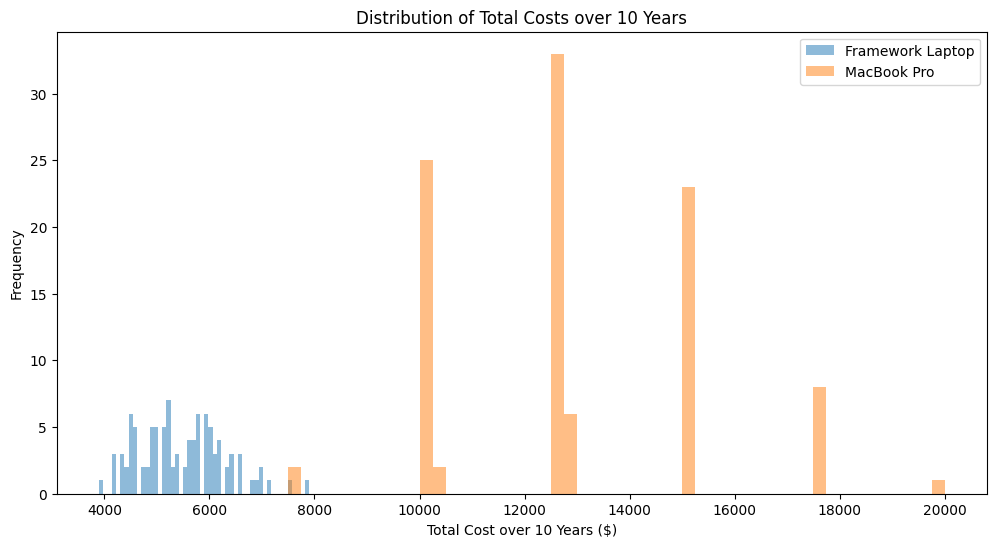

Average Debt Growth over 10 years for Framework Laptop: $0.00
Average Debt Growth over 10 years for MacBook Pro: $0.00


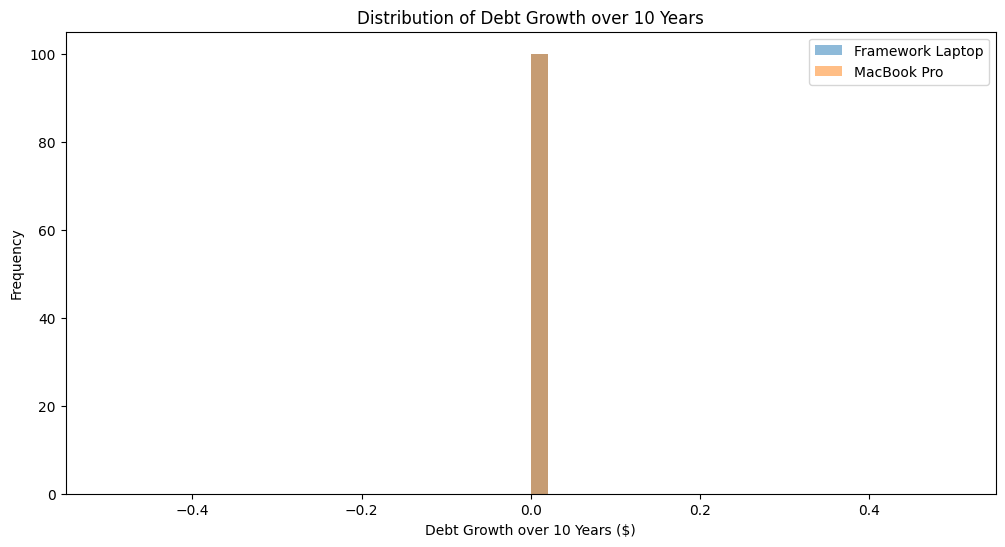

In [8]:

# Calculate average total costs
average_framework_cost = np.mean(framework_costs)
average_macbook_cost = np.mean(macbook_costs)

print(f"Average Total Cost over 10 years for Framework Laptop: ${average_framework_cost:.2f}")
print(f"Average Total Cost over 10 years for MacBook Pro: ${average_macbook_cost:.2f}")

# Plot histograms of total costs
plt.figure(figsize=(12, 6))
plt.hist(framework_costs, bins=50, alpha=0.5, label='Framework Laptop')
plt.hist(macbook_costs, bins=50, alpha=0.5, label='MacBook Pro')
plt.xlabel('Total Cost over 10 Years ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Costs over 10 Years')
plt.legend()
plt.show()

# Financial Impact Simulation
def simulate_financial_impact(total_costs, debts, annual_surplus):
    debt_growths = []
    for total_cost in total_costs:
        surplus = annual_surplus
        remaining_cost = total_cost - surplus * YEARS
        if remaining_cost <= 0:
            debt_growths.append(0)
        else:
            debt_growths.append(remaining_cost)
    return debt_growths

framework_debt_growth = simulate_financial_impact(framework_costs, debts, annual_surplus)
macbook_debt_growth = simulate_financial_impact(macbook_costs, debts, annual_surplus)

# Calculate average debt growth
average_framework_debt = np.mean(framework_debt_growth)
average_macbook_debt = np.mean(macbook_debt_growth)

print(f"Average Debt Growth over 10 years for Framework Laptop: ${average_framework_debt:.2f}")
print(f"Average Debt Growth over 10 years for MacBook Pro: ${average_macbook_debt:.2f}")

# Plot histograms of debt growth
plt.figure(figsize=(12, 6))
plt.hist(framework_debt_growth, bins=50, alpha=0.5, label='Framework Laptop')
plt.hist(macbook_debt_growth, bins=50, alpha=0.5, label='MacBook Pro')
plt.xlabel('Debt Growth over 10 Years ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Debt Growth over 10 Years')
plt.legend()
plt.show()


In [ ]:
# Test for loop idea

a=50
b=40

for i in range(30):
    for j in range(30):
        a+=1
        try:
            b+=5
            if b>a:
                b-=5
        except:
            
            
        print(f'a is {a}')
        print(f'b is {b}')

SyntaxError: 'return' outside function (3517149969.py, line 11)

Starting simulations for Framework Laptop...
Simulation 1, Year 2: Screen failed. Repair cost: $200
Simulation 1, Year 3: RAM failed. Repair cost: $100
Simulation 1, Year 4: CPU failed. Repair cost: $300
Simulation 1, Year 4: Memory failed. Repair cost: $200
Simulation 1, Year 5: RAM failed. Repair cost: $100
Simulation 1, Year 5: Screen failed. Repair cost: $200
Simulation 1, Year 5: Motherboard failed. Repair cost: $200
Simulation 1, Year 6: GFX Card failed. Repair cost: $1000
Simulation 1, Year 6: Power Supply failed. Repair cost: $200
Simulation 1, Year 7: CPU failed. Repair cost: $300
Simulation 1, Year 9: CPU failed. Repair cost: $300
Simulation 1, Year 9: RAM failed. Repair cost: $100
Simulation 1, Year 9: GFX Card failed. Repair cost: $1000
Simulation 1, Year 9: Screen failed. Repair cost: $200
Simulation 1, Year 9: Memory failed. Repair cost: $200
Simulation 2, Year 1: GFX Card failed. Repair cost: $1000
Simulation 2, Year 2: CPU failed. Repair cost: $300
Simulation 2, Year 2:

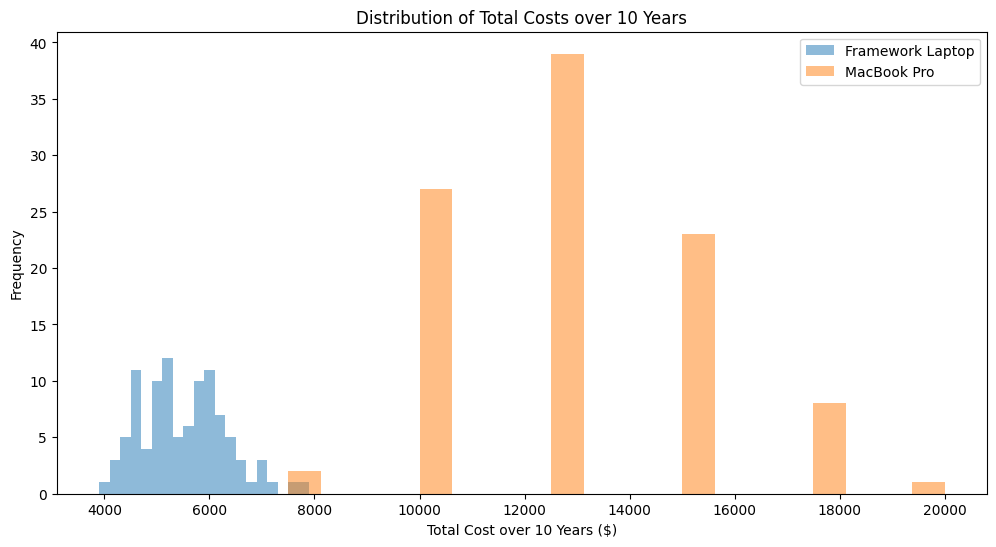

In [9]:
class Component:
    def __init__(self, name, failure_probs, repair_cost, replace_entire_product=False):
        self.name = name
        self.failure_probs = failure_probs
        self.repair_cost = repair_cost
        self.replace_entire_product = replace_entire_product
        self.age = 0

    def get_failure_probability(self):
        if self.age < len(self.failure_probs):
            return self.failure_probs[self.age]
        else:
            return self.failure_probs[-1]

    def increment_age(self):
        self.age += 1

    def reset_age(self):
        self.age = 0

class Product:
    def __init__(self, name, initial_cost, components):
        self.name = name
        self.initial_cost = initial_cost
        self.components = components

def simulate_repair_costs(product):
    # Implement the simulation using Product and Component instances
    pass

# Define MacBook Pro components
macbook_components = [
    Component(
        name='CPU',
        failure_probs=[.05, .10, .15, .2, .4, .6, .8, .99, 1.0, 1.0],
        repair_cost=2500,
        replace_entire_product=True  # Replaces entire laptop
    ),
    Component(
        name='RAM',
        failure_probs=[.05, .10, .2, .4, .6, .8, 0.9, 1.0, 1.0, 1.0],
        repair_cost=2500,
        replace_entire_product=True
    ),
    Component(
        name='GFX Card',
        failure_probs=[.05, .1, .15, .2, .3, .4, .6, .8, 0.9, 1.0],
        repair_cost=2500,
        replace_entire_product=True
    ),
    Component(
        name='Screen',
        failure_probs=[.10, .15, .2, .4, .6, .8, 0.9, 1.0, 1.0, 1.0],
        repair_cost=100,
        replace_entire_product=False  # Screen can be replaced individually
    ),
    Component(
        name='Motherboard',
        failure_probs=[.05, .1, .15, .2, .6, .7, .8, 0.9, 1.0, 1.0],
        repair_cost=2500,
        replace_entire_product=True
    ),
    Component(
        name='Memory',
        failure_probs=[.05, .08, .15, .25, .45, .65, .85, 0.95, 1.0, 1.0],
        repair_cost=2500,
        replace_entire_product=True
    ),
    Component(
        name='Power Supply',
        failure_probs=[.04, .08, .12, .2, .3, .6, .8, 0.9, 1.0, 1.0],
        repair_cost=2500,
        replace_entire_product=True
    )
]

# Define Framework Laptop components
framework_components = [
    Component(
        name='CPU',
        failure_probs=[.05, .10, .15, .2, .25, .4, .6, .8, 0.9, 1.0],
        repair_cost=300
    ),
    Component(
        name='RAM',
        failure_probs=[.05, .10, .2, .4, .6, .8, 0.9, 1.0, 1.0, 1.0],
        repair_cost=100
    ),
    Component(
        name='GFX Card',
        failure_probs=[.05, .1, .15, .2, .3, .4, .6, .8, 0.9, 1.0],
        repair_cost=1000
    ),
    Component(
        name='Screen',
        failure_probs=[.10, .15, .2, .4, .6, .8, 0.9, 1.0, 1.0, 1.0],
        repair_cost=200
    ),
    Component(
        name='Motherboard',
        failure_probs=[.05, .1, .15, .2, .4, .6, .8, 0.9, 1.0, 1.0],
        repair_cost=200
    ),
    Component(
        name='Memory',
        failure_probs=[.05, .08, .15, .25, .45, .65, .85, 0.95, 1.0, 1.0],
        repair_cost=200
    ),
    Component(
        name='Power Supply',
        failure_probs=[.04, .08, .12, .2, .3, .6, .8, 0.9, 1.0, 1.0],
        repair_cost=200
    )
]

# Create Product instances
framework_laptop = Product(
    name='Framework Laptop',
    initial_cost=1500,
    components=framework_components
)

macbook_pro = Product(
    name='MacBook Pro',
    initial_cost=2500,
    components=macbook_components
)

def simulate_repair_costs(product, num_simulations=100, years=10):
    total_costs = []
    print(f"Starting simulations for {product.name}...")
    
    for sim in range(num_simulations):
        total_cost = product.initial_cost
        
        if product.name == 'MacBook Pro':
            laptop_age = 0
        else:
            # For Framework Laptop, component ages are tracked individually
            for component in product.components:
                component.reset_age()
        
        for year in range(years):
            if product.name == 'MacBook Pro':
                total_cost, laptop_age = simulate_macbook_year(
                    product, total_cost, laptop_age, sim, year
                )
            else:
                total_cost = simulate_framework_year(
                    product, total_cost, sim, year
                )
        
        total_costs.append(total_cost)
    return total_costs

def simulate_macbook_year(product, total_cost, laptop_age, sim, year):
    laptop_year = laptop_age
    laptop_age += 1
    component_failed = False
    
    for component in product.components:
        failure_prob = component.failure_probs[laptop_year] if laptop_year < len(component.failure_probs) else component.failure_probs[-1]
        
        if np.random.rand() < failure_prob:
            if component.replace_entire_product:
                # Replace entire laptop
                total_cost += product.initial_cost
                laptop_age = 0  # Reset laptop age
                component_failed = True
                print(f"Simulation {sim+1}, Year {year+1}: {component.name} failed. Replacing entire MacBook Pro.")
                break  # Exit loop since laptop is replaced
            else:
                # Replace component (Screen)
                total_cost += component.repair_cost
                print(f"Simulation {sim+1}, Year {year+1}: {component.name} failed. Repair cost: ${component.repair_cost}")
    return total_cost, laptop_age

def simulate_framework_year(product, total_cost, sim, year):
    for component in product.components:
        failure_prob = component.get_failure_probability()
        
        if np.random.rand() < failure_prob:
            # Replace component
            total_cost += component.repair_cost
            component.reset_age()
            print(f"Simulation {sim+1}, Year {year+1}: {component.name} failed. Repair cost: ${component.repair_cost}")
        else:
            component.increment_age()
    return total_cost

import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

NUM_SIMULATIONS = 100
YEARS = 10

# Simulate for Framework Laptop
framework_costs = simulate_repair_costs(framework_laptop, NUM_SIMULATIONS, YEARS)

# Simulate for MacBook Pro
macbook_costs = simulate_repair_costs(macbook_pro, NUM_SIMULATIONS, YEARS)

average_framework_cost = np.mean(framework_costs)
average_macbook_cost = np.mean(macbook_costs)

print(f"\nAverage Total Cost over {YEARS} years for Framework Laptop: ${average_framework_cost:.2f}")
print(f"Average Total Cost over {YEARS} years for MacBook Pro: ${average_macbook_cost:.2f}")

# Plot histograms of total costs
plt.figure(figsize=(12, 6))
plt.hist(framework_costs, bins=20, alpha=0.5, label='Framework Laptop')
plt.hist(macbook_costs, bins=20, alpha=0.5, label='MacBook Pro')
plt.xlabel('Total Cost over 10 Years ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Costs over 10 Years')
plt.legend()
plt.show()

